This notebook contains the Data Science Project by Katie Tooher an inquiry into US Education data by state. This data set was sourced from Kaggle https://www.kaggle.com/noriuk/us-education-datasets-unification-project#states_all_extended.csv

For the purposes of this project we will be using the "states_all_extended.csv" because it contains all the numbers for each state's education statistics but includes enrollment data for race and gender.

Data Ranges from 1992 to 2017

JUST SO YOU KNOW THE BOKEH PLOTS ARE SAVED AS HTML AND YOU NEED TO OPEN THEM LOCALLY, SORRY

In [70]:
import pandas as pd                   #alias --> pd
import datetime                       #getting current realtime
from os import listdir
from os.path import isfile, join
import glob                           #a library to specify using unix / paths
import re 
import numpy as np

In [73]:
##reading entire csv
df = pd.read_csv("Unclean-HTML/states_all_extended_copy.csv")
df

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,794146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,826442.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1995,727480.0,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,888983.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,211.646973,256.594863,210.920767,260.276441
5,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,1075352.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,1155492.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ALABAMA,1999,737639.0,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,1208081.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,1319053.0,...,NaN,NaN,NaN,NaN,NaN,NaN,217.941053,262.158206,206.880030,258.777258
9,ALABAMA,2001,728532.0,4832946.0,466150.0,2879636.0,1487160.0,5086045.0,2656393.0,1374265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


At first inspection of this dataset, it already follows the basic principles of tidy data in the sense that each row shows an entire instance of one year for a state with each of its other kpi's like revenue, expenditure, etc. 

The basic things that needed to be cleaned were certain sections that were missing data -- most 2017 rows were missing the data because that must have been the latest the data was inputed. 
Sections like NORTHERN_MARIANAS and NORTHERN_MARIANA_ISLANDS had different names, but were the same territory after further inspection that had changed their legal name, or were perhaps inputed incorretly. 

The following sections did not make sense to leave into the dataset:
    DOD_-_FOREIGN	
    DOD_-_DOMESTIC	
    DOD_-_OVERSEAS	
    DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)	
    DOD_DOMESTIC

In [74]:
import os
import folium
import pandas as pd
import geopandas


In [75]:
us_states = os.path.join('Unclean-HTML/us_states.json')

In [85]:
import geopandas

gdf = geopandas.read_file(us_states)

m = folium.Map([43, -100], zoom_start=4)

folium.GeoJson(
    gdf,
).add_to(m)

m.save(os.path.join('Unclean-HTML/enrollment.html'))

m

In [86]:
m = folium.Map([43, -100], zoom_start=4)

folium.GeoJson(
    us_states,
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)

m.save(os.path.join('Unclean-HTML/enrollment.html'))

m

In [87]:
m = folium.Map([43, -100], zoom_start=4)

folium.GeoJson(
    us_states,
    style_function=lambda feature: {
        'fillColor': 'green' if 'e' in feature['properties']['name'].lower() else '#ffff00',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)

m.save(os.path.join('Unclean-HTML/enrollment.html'))

m

In [88]:
#load data
state_education = os.path.join("Unclean-HTML/States_Averages.csv")
state_data = pd.read_csv(state_education)
state_data.head(10)

,id,State,Average,Unnamed: 3
0,AL,ALABAMA,684875,NaN
1,AK,ALASKA,121258,NaN
2,AZ,ARIZONA,878632,NaN
3,AR,ARKANSAS,428071,NaN
4,CA,CALIFORNIA,5562741,NaN
5,CO,COLORADO,704613,NaN
6,CT,CONNECTICUT,506519,NaN
7,DE,DELAWARE,110613,NaN
8,FL,FLORIDA,2304123,NaN
9,GA,GEORGIA,1402157,NaN


In [89]:
state_data.drop(['Unnamed: 3'], axis=1)

,id,State,Average
0,AL,ALABAMA,684875
1,AK,ALASKA,121258
2,AZ,ARIZONA,878632
3,AR,ARKANSAS,428071
4,CA,CALIFORNIA,5562741
5,CO,COLORADO,704613
6,CT,CONNECTICUT,506519
7,DE,DELAWARE,110613
8,FL,FLORIDA,2304123
9,GA,GEORGIA,1402157


In [90]:
#a function that maps one value to a RGB color (of the form #RRGGBB)
from branca.colormap import linear

colormap = linear.YlGn_09.scale(
    state_data.Average.min(),
    state_data.Average.max())

print(colormap(5.0))

colormap

#ffffe5


In [91]:
education_dict = state_data.set_index('id')['Average']
education_dict['AL']
education_dict['CA']
#print(education_dict)

5562741

In [95]:
#now choropleth
color_dict = {key: colormap(education_dict[key]) for key in education_dict.keys()}
print(color_dict)

{'AL': '#f8fdbf', 'AK': '#ffffe3', 'AZ': '#f3fbb6', 'AR': '#fbfecf', 'CA': '#004529', 'CO': '#f8fdbd', 'CT': '#fbfeca', 'DE': '#ffffe4', 'FL': '#a0d889', 'GA': '#dcf1a5', 'HI': '#feffe0', 'ID': '#feffdb', 'IL': '#bee596', 'IN': '#f0fab4', 'IA': '#fbfece', 'KS': '#fbfecf', 'KY': '#f9fdc3', 'LA': '#f9fdc0', 'ME': '#feffdf', 'MD': '#f7fcb9', 'MA': '#f3fbb6', 'MI': '#d7efa2', 'MN': '#f7fcb9', 'MS': '#fbfece', 'MO': '#f4fbb7', 'MT': '#ffffe2', 'NE': '#fdffd9', 'NV': '#fcfed5', 'NH': '#feffdf', 'NJ': '#e6f6ad', 'NM': '#fdffd7', 'NY': '#92d283', 'NC': '#e2f4aa', 'ND': '#ffffe4', 'OH': '#ccea9d', 'OK': '#fafdc5', 'OR': '#fafeca', 'PA': '#cceb9d', 'PR': '#fbfecb', 'RI': '#ffffe2', 'SC': '#f9fdc1', 'SD': '#ffffe3', 'TN': '#f4fbb6', 'TX': '#288b47', 'UT': '#fbfecc', 'VT': '#ffffe5', 'VA': '#edf8b2', 'WA': '#f0f9b4', 'WV': '#fdffd9', 'WI': '#f6fcb8', 'WY': '#ffffe5'}


In [96]:
colormap.caption = 'Education Enrollment Color Scale'
colormap.add_to(m)

m.save(os.path.join('Unclean-HTML/enrollment.html'))

m

In [97]:
#load data
import os
import pandas as pd
expense = os.path.join("Unclean-HTML/average_expenditure.csv")
expense = pd.read_csv(expense)
expense.head(10)

,id,State,Average_Expenditure
0,AL,ALABAMA,5450269.00
1,AK,ALASKA,1817666.40
2,AZ,ARIZONA,6549709.12
3,AR,ARKANSAS,3707725.96
4,CA,CALIFORNIA,56247851.32
5,CO,COLORADO,6662776.40
6,CT,CONNECTICUT,7197858.72
7,DE,DELAWARE,1374873.48
8,FL,FLORIDA,21287605.24
9,GA,GEORGIA,13332004.36


In [98]:
#a function that maps one value to a RGB color (of the form #RRGGBB)
from branca.colormap import linear

colormap = linear.PuRd_09.scale(
    expense.Average_Expenditure.min(),
    expense.Average_Expenditure.max())

print(colormap(5.0))

colormap

#f7f4f9


In [99]:
education_dict = expense.set_index('id')['Average_Expenditure']


In [100]:
#now choropleth
color_dict = {key: colormap(education_dict[key]) for key in education_dict.keys()}
print(color_dict)

{'AL': '#ede8f3', 'AK': '#f6f2f8', 'AZ': '#ebe5f1', 'AR': '#f1edf6', 'CA': '#67001f', 'CO': '#eae5f1', 'CT': '#e9e3f0', 'DE': '#f7f3f9', 'FL': '#ca96c8', 'GA': '#d8c2df', 'HI': '#f6f2f8', 'ID': '#f6f3f9', 'IL': '#ca96c8', 'IN': '#e3d9eb', 'IA': '#efeaf4', 'KS': '#f0ecf5', 'KY': '#ede8f3', 'LA': '#ece7f2', 'ME': '#f5f1f8', 'MD': '#e3d8ea', 'MA': '#ddcbe4', 'MI': '#d1add4', 'MN': '#e5dced', 'MS': '#f2eef6', 'MO': '#e8e2f0', 'MT': '#f7f4f9', 'NE': '#f3eff7', 'NV': '#f3eff6', 'NH': '#f5f1f8', 'NJ': '#cc9dcc', 'NM': '#f3f0f7', 'NY': '#c00d51', 'NC': '#e0d2e8', 'ND': '#f7f4f9', 'OH': '#d0a9d2', 'OK': '#efebf4', 'OR': '#eee9f3', 'PA': '#ca93c7', 'RI': '#f6f3f8', 'SC': '#ece6f2', 'SD': '#f7f4f9', 'TN': '#eae5f1', 'TX': '#dd1f75', 'UT': '#f2eef6', 'VT': '#f6f3f9', 'VA': '#ddcbe4', 'WA': '#e3d8eb', 'WV': '#f4f0f7', 'WI': '#e4dbec', 'WY': '#f7f4f9'}


In [101]:
import folium
n = folium.Map([43, -100], zoom_start=4)

folium.GeoJson(
    us_states,
    style_function=lambda feature: {
        'fillColor': color_dict[feature['id']],
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(n)

n.save(os.path.join('Unclean-HTML/expensesmap.html'))
n

In [102]:
colormap.caption = 'Average Education Expenditure by State'
colormap.add_to(n)

n.save(os.path.join('Unclean-HTML/expensesmap.html'))

n

In [104]:
#create column data source from data frame
import pandas
from bokeh.plotting import figure,output_file,show,ColumnDataSource,save
dfe = pandas.read_csv("Unclean-HTML/average_expenditure.csv")
source = ColumnDataSource(dfe)
from bokeh.models.tools import HoverTool

#add color pallet based on chosen factor
from bokeh.transform import factor_cmap
from bokeh.palettes import Blues8

output_file('Unclean-HTML/barchart.html')
state_list = source.data['State'].tolist()
aves_list = source.data['Average_Expenditure'].tolist()
p = figure(y_range=state_list,
           title = 'Average Education Expenditure per State',
           plot_height=600,
           plot_width=600,
           x_axis_label = 'Average Spending per State on Education (mil) 1992-2015',
           y_axis_label = "State",
        tools ="pan,box_select,zoom_in,zoom_out,save"
          )

#glyph line chart
p.hbar(y = 'State',
       right='Average_Expenditure',
       left=9000,
       height=0.4,
       color = "purple",
       fill_alpha=10,
       source = source
       #legend = 'State'
      )

##add legend
# p.legend.orientation='vertical'
# p.legend.location='top_right'
# p.legend.label_text_font_size='10px'

##add tooltips
hover = HoverTool()
hover.tooltips = """
    <div>
        <h3>@State</h3>
        <div><strong> Average: </strong> @Average_Expenditure</div>
    </div>
"""
p.add_tools(hover)

save(p)

'/Users/katietooher/DataScience/Tooher-006108088/Unclean-HTML/barchart.html'

In [105]:
##scatter plot 1 Albama

dfstate2 = pandas.read_csv("Unclean-HTML/alabama.csv")


##USE FOR SECOND SMALLER CHART
from bokeh.plotting import figure,output_file,show,ColumnDataSource,save
source = ColumnDataSource(dfstate2)


output_file('Unclean-HTML/scatterAla.html')
p = figure(plot_width = 600,plot_height= 600,
           title = 'Total State Expenditure for Alabama Education',
           x_axis_label = 'Years 1992-2016',
            y_axis_label = "Spendings on Education")

year_list = source.data['YEAR'].tolist()
expenditure = source.data['TOTAL_EXPENDITURE'].tolist()

p.circle(x = year_list,
        y = expenditure,
        size = 10,
        color = 'navy')


save(p)

'/Users/katietooher/DataScience/Tooher-006108088/Unclean-HTML/scatterAla.html'

In [109]:
##scatter plot 2 california 
import pandas 
dfstate3 = pandas.read_csv("Unclean-HTML/california.csv")
source2 = ColumnDataSource(dfstate3)
year_list = source2.data['Year'].tolist()
expenditure = source2.data['TOTAL_EXPENDITURE'].tolist()

output_file('Unclean-HTML/scatterCal.html')
p = figure(plot_width = 600,plot_height= 600,
           title = 'Total State Expenditure for California Education',
           x_axis_label = 'Years 1992-2016',
            y_axis_label = "Spendings on Education")


p.circle(x = year_list,
        y = expenditure,
        size = 10,
        color = 'Blue')
save(p)

'/Users/katietooher/DataScience/Tooher-006108088/Unclean-HTML/scatterCal.html'

Now for more cleaning of extrenouous data, I made the decision to remove the rows that contained these "STATE" values mainly because I don't understand why department of defense counts as a United States "State" education category.
These are the categories that I will remove:
    DOD_DOMESTIC
    DOD_OVERSEAS
    DOD_-_FOREIGN
    DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY
    DEPARTMENT_OF_DEFENSE
    DOD
    DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)
    
In addition I am going to remove (but place in a different excell sheet) the data for the following US territories because the amount of data that they have is far less than that of the other states. 
    
    


Rows to fix -- IE these values were either entered incorrectly or had name changes at some point during the collection of this data:
    AS 1998 -- American Samoa 

In [111]:
df2 = pd.read_csv("states_all_extended_cleaned.csv",index_col=[0])

##delete all the rows for the ENROLL column that contain the NaN values
df2 = df2.dropna(subset=['ENROLL'])

##now to remove the pesky rows that don't make sense for this dataset
df2 = df2[df2.STATE != 'DOD_DOMESTIC']
df2 = df2[df2.STATE != 'DOD_OVERSEAS']
df2 = df2[df2.STATE != 'DOD_-_FOREIGN']
df2 = df2[df2.STATE != 'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY']
df2 = df2[df2.STATE != 'DEPARTMENT_OF_DEFENSE']
df2 = df2[df2.STATE != 'DOD']
df2 = df2[df2.STATE != 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)']
df2

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1993_ALABAMA,ALABAMA,1993,727716,2827391,331409,1729295,766687,2833433,1564558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993_ALASKA,ALASKA,1993,121156,1191398,176150,775829,239419,1126398,494917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993_ARIZONA,ARIZONA,1993,676297,3427976,318465,1415407,1694104,3623946,1578889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993_ARKANSAS,ARKANSAS,1993,311432,1346909,128196,771079,447634,1376067,782791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993_CALIFORNIA,CALIFORNIA,1993,5129788,28043338,2151157,17064146,8828035,28110986,15281147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993_COLORADO,COLORADO,1993,539538,3058326,147793,1242337,1668196,3028305,1537714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1993_CONNECTICUT,CONNECTICUT,1993,471918,4064158,149204,1433539,2481415,4079943,2302852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1993_DELAWARE,DELAWARE,1993,104355,683954,44497,443250,196207,694534,394680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1993_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1993,80937,721151,73882,0,647269,719440,339266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993_FLORIDA,FLORIDA,1993,1980569,11370156,947326,5520893,4901937,11425183,5333136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
##saves the excell sheet with the cleaned data 
df2 = df2.to_csv('states_all_extended_cleaned.csv', encoding='utf-8')

Topics of Research:
1. How do each states compulsory education laws affect the enrollment and or spending on education?

2. How are test scores for states related to the educational spending per state and why might this be?

3. How might spending on education be related to gender or ethnicity

Now to Linear and Logistic Regression Models

Linear Regression Assumptions:
1. The values used are numeric and not categorical 
2. Data is free of missing values
3. There is a linear relationship between predictors and predicants
4. All predictors are independent of one another 
5. Residuals are normally distributed (perhaps in a perfect world)

In [113]:
## This perhaps falls into the category of resource consumption forecasting 
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from collections import Counter
df2 = pd.read_csv("states_all_extended_cleaned.csv")

In [115]:
#first linear regression will look at these 3 kpis 
df3 = df2[['STATE', 'YEAR','TOTAL_REVENUE']].copy()
df3

,STATE,YEAR,TOTAL_REVENUE
0,ALABAMA,1993,2827391
1,ALASKA,1993,1191398
2,ARIZONA,1993,3427976
3,ARKANSAS,1993,1346909
4,CALIFORNIA,1993,28043338
5,COLORADO,1993,3058326
6,CONNECTICUT,1993,4064158
7,DELAWARE,1993,683954
8,DISTRICT_OF_COLUMBIA,1993,721151
9,FLORIDA,1993,11370156


In [117]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [118]:
texas_1993expense = df2.loc[df2['YEAR'] == '1993','TOTAL_EXPENDITURE']
for i in range(len(texas_1993expense)):
    print(texas_1993expense[i])

doof = df2[['STATE','YEAR','TOTAL_EXPENDITURE','GRADES_12_AM','GRADES_12_BL','GRADES_12_HI']]

y1993 = doof.query("YEAR == 1993")['TOTAL_EXPENDITURE'].sum()
y1994 = doof.query("YEAR == 1994")['TOTAL_EXPENDITURE'].sum()
y1995 = doof.query("YEAR == 1995")['TOTAL_EXPENDITURE'].sum()
y1996 = doof.query("YEAR == 1996")['TOTAL_EXPENDITURE'].sum()
y1997 = doof.query("YEAR == 1997")['TOTAL_EXPENDITURE'].sum()
y1998 = doof.query("YEAR == 1998")['TOTAL_EXPENDITURE'].sum()
y1999 = doof.query("YEAR == 1999")['TOTAL_EXPENDITURE'].sum()
y2000 = doof.query("YEAR == 2000")['TOTAL_EXPENDITURE'].sum()
y2001 = doof.query("YEAR == 2001")['TOTAL_EXPENDITURE'].sum()
y2002 = doof.query("YEAR == 2002")['TOTAL_EXPENDITURE'].sum()
y2003 = doof.query("YEAR == 2003")['TOTAL_EXPENDITURE'].sum()
y2004 = doof.query("YEAR == 2004")['TOTAL_EXPENDITURE'].sum()
y2005 = doof.query("YEAR == 2005")['TOTAL_EXPENDITURE'].sum()
y2006 = doof.query("YEAR == 2006")['TOTAL_EXPENDITURE'].sum()
y2007 = doof.query("YEAR == 2007")['TOTAL_EXPENDITURE'].sum()
y2008 = doof.query("YEAR == 2008")['TOTAL_EXPENDITURE'].sum()
y2009 = doof.query("YEAR == 2009")['TOTAL_EXPENDITURE'].sum()
y2010 = doof.query("YEAR == 2010")['TOTAL_EXPENDITURE'].sum()
y2011 = doof.query("YEAR == 2011")['TOTAL_EXPENDITURE'].sum()
y2012 = doof.query("YEAR == 2012")['TOTAL_EXPENDITURE'].sum()
y2013 = doof.query("YEAR == 2013")['TOTAL_EXPENDITURE'].sum()
y2014 = doof.query("YEAR == 2014")['TOTAL_EXPENDITURE'].sum()
y2015 = doof.query("YEAR == 2015")['TOTAL_EXPENDITURE'].sum()
y2016 = doof.query("YEAR == 2016")['TOTAL_EXPENDITURE'].sum()


am1993 = doof.query("YEAR == 1993")['GRADES_12_AM'].sum()
am1994 = doof.query("YEAR == 1994")['GRADES_12_AM'].sum()
am1995 = doof.query("YEAR == 1995")['GRADES_12_AM'].sum()
am1996 = doof.query("YEAR == 1996")['GRADES_12_AM'].sum()
am1997 = doof.query("YEAR == 1997")['GRADES_12_AM'].sum()
am1998 = doof.query("YEAR == 1998")['GRADES_12_AM'].sum()
am1999 = doof.query("YEAR == 1999")['GRADES_12_AM'].sum()
am2000 = doof.query("YEAR == 2000")['GRADES_12_AM'].sum()
am2001 = doof.query("YEAR == 2001")['GRADES_12_AM'].sum()
am2002 = doof.query("YEAR == 2002")['GRADES_12_AM'].sum()
am2003 = doof.query("YEAR == 2003")['GRADES_12_AM'].sum()
am2004 = doof.query("YEAR == 2004")['GRADES_12_AM'].sum()
am2005 = doof.query("YEAR == 2005")['GRADES_12_AM'].sum()
am2006 = doof.query("YEAR == 2006")['GRADES_12_AM'].sum()
am2007 = doof.query("YEAR == 2007")['GRADES_12_AM'].sum()
am2008 = doof.query("YEAR == 2008")['GRADES_12_AM'].sum()
am2009 = doof.query("YEAR == 2009")['GRADES_12_AM'].sum()
am2010 = doof.query("YEAR == 2010")['GRADES_12_AM'].sum()
am2011 = doof.query("YEAR == 2011")['GRADES_12_AM'].sum()
am2012 = doof.query("YEAR == 2012")['GRADES_12_AM'].sum()
am2013 = doof.query("YEAR == 2013")['GRADES_12_AM'].sum()
am2014 = doof.query("YEAR == 2014")['GRADES_12_AM'].sum()
am2015 = doof.query("YEAR == 2015")['GRADES_12_AM'].sum()
am2016 = doof.query("YEAR == 2016")['GRADES_12_AM'].sum()

bl1993 = doof.query("YEAR == 1993")['GRADES_12_BL'].sum()
bl1994 = doof.query("YEAR == 1994")['GRADES_12_BL'].sum()
bl1995 = doof.query("YEAR == 1995")['GRADES_12_BL'].sum()
bl1996 = doof.query("YEAR == 1996")['GRADES_12_BL'].sum()
bl1997 = doof.query("YEAR == 1997")['GRADES_12_BL'].sum()
bl1998 = doof.query("YEAR == 1998")['GRADES_12_BL'].sum()
bl1999 = doof.query("YEAR == 1999")['GRADES_12_BL'].sum()
bl2000 = doof.query("YEAR == 2000")['GRADES_12_BL'].sum()
bl2001 = doof.query("YEAR == 2001")['GRADES_12_BL'].sum()
bl2002 = doof.query("YEAR == 2002")['GRADES_12_BL'].sum()
bl2003 = doof.query("YEAR == 2003")['GRADES_12_BL'].sum()
bl2004 = doof.query("YEAR == 2004")['GRADES_12_BL'].sum()
bl2005 = doof.query("YEAR == 2005")['GRADES_12_BL'].sum()
bl2006 = doof.query("YEAR == 2006")['GRADES_12_BL'].sum()
bl2007 = doof.query("YEAR == 2007")['GRADES_12_BL'].sum()
bl2008 = doof.query("YEAR == 2008")['GRADES_12_BL'].sum()
bl2009 = doof.query("YEAR == 2009")['GRADES_12_BL'].sum()
bl2010 = doof.query("YEAR == 2010")['GRADES_12_BL'].sum()
bl2011 = doof.query("YEAR == 2011")['GRADES_12_BL'].sum()
bl2012 = doof.query("YEAR == 2012")['GRADES_12_BL'].sum()
bl2013 = doof.query("YEAR == 2013")['GRADES_12_BL'].sum()
bl2014 = doof.query("YEAR == 2014")['GRADES_12_BL'].sum()
bl2015 = doof.query("YEAR == 2015")['GRADES_12_BL'].sum()
bl2016 = doof.query("YEAR == 2016")['GRADES_12_BL'].sum()

hi1993 = doof.query("YEAR == 1993")['GRADES_12_HI'].sum()
hi1994 = doof.query("YEAR == 1994")['GRADES_12_HI'].sum()
hi1995 = doof.query("YEAR == 1995")['GRADES_12_HI'].sum()
hi1996 = doof.query("YEAR == 1996")['GRADES_12_HI'].sum()
hi1997 = doof.query("YEAR == 1997")['GRADES_12_HI'].sum()
hi1998 = doof.query("YEAR == 1998")['GRADES_12_HI'].sum()
hi1999 = doof.query("YEAR == 1999")['GRADES_12_HI'].sum()
hi2000 = doof.query("YEAR == 2000")['GRADES_12_HI'].sum()
hi2001 = doof.query("YEAR == 2001")['GRADES_12_HI'].sum()
hi2002 = doof.query("YEAR == 2002")['GRADES_12_HI'].sum()
hi2003 = doof.query("YEAR == 2003")['GRADES_12_HI'].sum()
hi2004 = doof.query("YEAR == 2004")['GRADES_12_HI'].sum()
hi2005 = doof.query("YEAR == 2005")['GRADES_12_HI'].sum()
hi2006 = doof.query("YEAR == 2006")['GRADES_12_HI'].sum()
hi2007 = doof.query("YEAR == 2007")['GRADES_12_HI'].sum()
hi2008 = doof.query("YEAR == 2008")['GRADES_12_HI'].sum()
hi2009 = doof.query("YEAR == 2009")['GRADES_12_HI'].sum()
hi2010 = doof.query("YEAR == 2010")['GRADES_12_HI'].sum()
hi2011 = doof.query("YEAR == 2011")['GRADES_12_HI'].sum()
hi2012 = doof.query("YEAR == 2012")['GRADES_12_HI'].sum()
hi2013 = doof.query("YEAR == 2013")['GRADES_12_HI'].sum()
hi2014 = doof.query("YEAR == 2014")['GRADES_12_HI'].sum()
hi2015 = doof.query("YEAR == 2015")['GRADES_12_HI'].sum()
hi2016 = doof.query("YEAR == 2016")['GRADES_12_HI'].sum()

yearly_ave = {'Year':[1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,
                        2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015],
              'Average Spending':[y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,y2001,y2002,y2003,y2004,
                        y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015],
             'GRADES_12_AM':[am1993,am1994,am1995,am1996,am1997,am1998,am1999,am2000,am2001,am2002,am2003,am2004,
                        am2005,am2006,am2007,am2008,am2009,am2010,am2011,am2012,am2013,am2014,am2015],
             'GRADES_12_BL':[bl1993,bl1994,bl1995,bl1996,bl1997,bl1998,bl1999,bl2000,bl2001,bl2002,bl2003,bl2004,
                        bl2005,bl2006,bl2007,bl2008,bl2009,bl2010,bl2011,bl2012,bl2013,bl2014,bl2015],
             'GRADES_12_HI':[hi1993,bl1994,hi1995,hi1996,hi1997,hi1998,hi1999,hi2000,hi2001,hi2002,hi2003,hi2004,
                        hi2005,hi2006,hi2007,hi2008,hi2009,hi2010,hi2011,hi2012,hi2013,hi2014,hi2015]}

ydf = pd.DataFrame(yearly_ave)
ydf

/Users/katietooher/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Year,Average Spending,GRADES_12_AM,GRADES_12_BL,GRADES_12_HI
0,1993,244202408,23250.0,318766.0,235666.0
1,1994,252664869,24522.0,327543.0,327543.0
2,1995,281831835,25038.0,329186.0,248978.0
3,1996,297740499,25939.0,341082.0,258546.0
4,1997,315861220,26317.0,338470.0,275551.0
5,1998,336384794,25114.0,361153.0,281666.0
6,1999,360474429,28922.0,367525.0,308823.0
7,2000,386177409,29954.0,381190.0,330062.0
8,2001,417014891,30869.0,392273.0,351507.0
9,2002,442685445,33139.0,413748.0,383964.0


In [119]:
##linear regression, how does total average spending over time affect the enrollment of different demographics of children
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

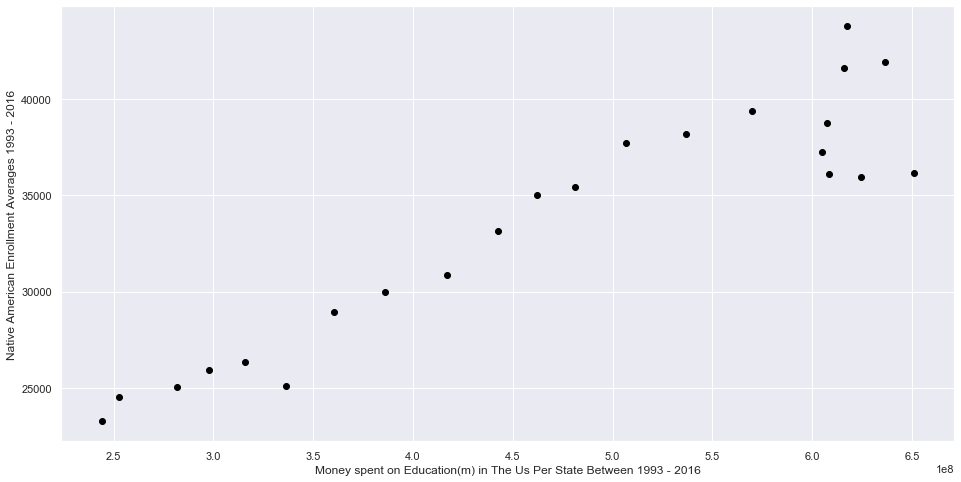

In [120]:
##scatter plot 2 all averages 
#when you put it all together it's quite sporadic
plt.figure(figsize=(16, 8))
plt.scatter(
    ydf['Average Spending'],
    ydf['GRADES_12_AM'],
    c='black'
)
plt.xlabel("Money spent on Education(m) in The Us Per State Between 1993 - 2016")
plt.ylabel("Native American Enrollment Averages 1993 - 2016")
plt.show()

In [121]:
X = ydf['Average Spending'].values.reshape(-1,1)
y = ydf['GRADES_12_AM'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 1.364e+04 + 4.2057e-05X


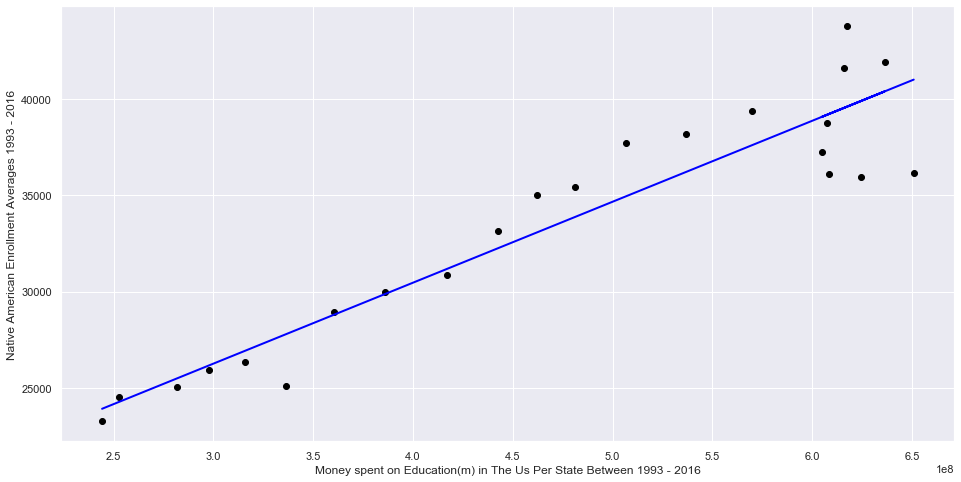

In [122]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    ydf['Average Spending'],
    ydf['GRADES_12_AM'],
    c='black'
)
plt.plot(
    ydf['Average Spending'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on Education(m) in The Us Per State Between 1993 - 2016")
plt.ylabel("Native American Enrollment Averages 1993 - 2016")
plt.show()

In [123]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     148.5
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           5.47e-11
Time:                        23:58:39   Log-Likelihood:                -209.17
No. Observations:                  23   AIC:                             422.3
Df Residuals:                      21   BIC:                             424.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.364e+04   1695.550      8.044      0.0

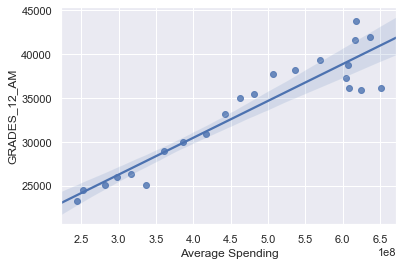

In [124]:
import seaborn as sns
sns.regplot(x='Average Spending', y='GRADES_12_AM', data=ydf);
##the data with the confidence interval

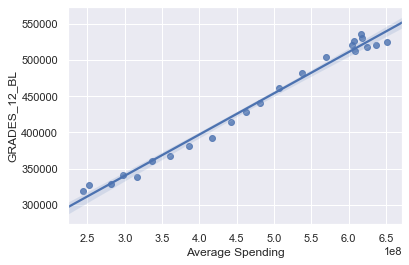

In [125]:
sns.regplot(x='Average Spending', y='GRADES_12_BL', data=ydf);

The linear model is: Y = 1.6911e+05 + 0.00057003X


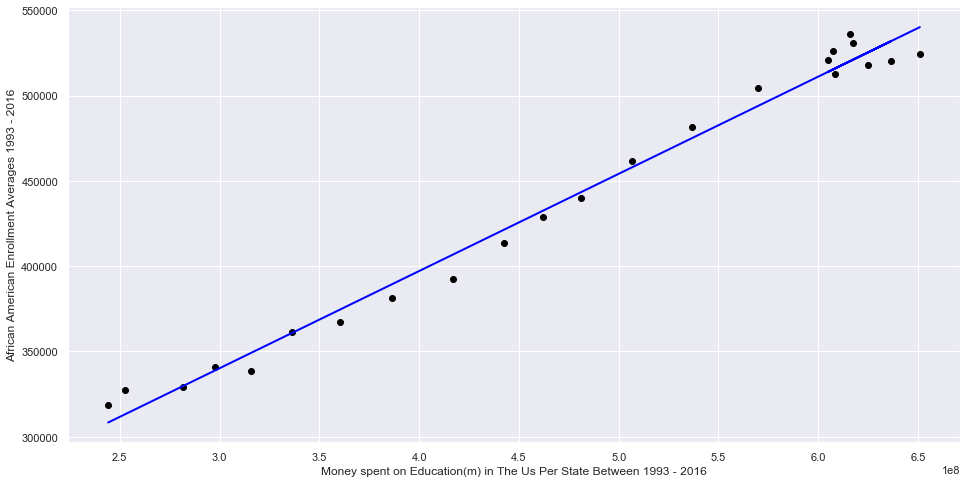

In [126]:
Xb = ydf['Average Spending'].values.reshape(-1,1)
yb = ydf['GRADES_12_BL'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xb, yb)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

predictions = reg.predict(Xb)
plt.figure(figsize=(16, 8))
plt.scatter(
    ydf['Average Spending'],
    ydf['GRADES_12_BL'],
    c='black'
)
plt.plot(
    ydf['Average Spending'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on Education(m) in The Us Per State Between 1993 - 2016")
plt.ylabel("African American Enrollment Averages 1993 - 2016")
plt.show()

In [127]:
X2b = sm.add_constant(Xb)
est = sm.OLS(yb, X2b)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1476.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           6.05e-21
Time:                        23:58:48   Log-Likelihood:                -242.71
No. Observations:                  23   AIC:                             489.4
Df Residuals:                      21   BIC:                             491.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.691e+05   7289.902     23.198      0.0

The linear model is: Y = -1.419e+05 + 0.0013265X


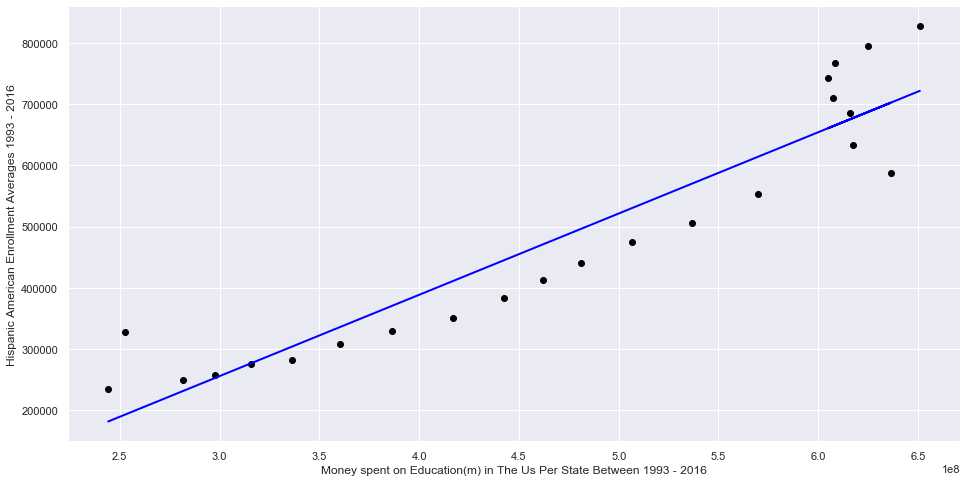

In [128]:
Xh = ydf['Average Spending'].values.reshape(-1,1)
yh = ydf['GRADES_12_HI'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xh, yh)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

predictions = reg.predict(Xb)
plt.figure(figsize=(16, 8))
plt.scatter(
    ydf['Average Spending'],
    ydf['GRADES_12_HI'],
    c='black'
)
plt.plot(
    ydf['Average Spending'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on Education(m) in The Us Per State Between 1993 - 2016")
plt.ylabel("Hispanic American Enrollment Averages 1993 - 2016")
plt.show()

In [129]:
X2h = sm.add_constant(Xh)
est = sm.OLS(yh, X2h)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     148.8
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           5.36e-11
Time:                        23:58:51   Log-Likelihood:                -288.53
No. Observations:                  23   AIC:                             581.1
Df Residuals:                      21   BIC:                             583.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.419e+05   5.34e+04     -2.656      0.0

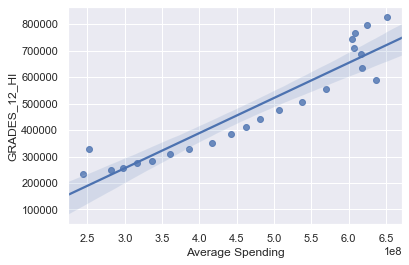

In [130]:
sns.regplot(x='Average Spending', y='GRADES_12_HI', data=ydf);

In [131]:
X = np.column_stack((ydf['GRADES_12_AM'], ydf['GRADES_12_BL'], ydf['GRADES_12_HI']))
y = ydf['Average Spending']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Average Spending   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     452.1
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           7.73e-18
Time:                        23:58:54   Log-Likelihood:                -414.18
No. Observations:                  23   AIC:                             836.4
Df Residuals:                      19   BIC:                             840.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.639e+08   5.81e+07     -4.544      0.0

In [132]:
df5 = df2[['YEAR','STATE','TOTAL_EXPENDITURE','AVG_MATH_8_SCORE',
            'AVG_READING_8_SCORE']].copy()
df5 = df5.dropna(subset=['AVG_MATH_8_SCORE'])
df5

,YEAR,STATE,TOTAL_EXPENDITURE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
153,1996,ALABAMA,3572283,256.594863,260.276441
154,1996,ALASKA,1240031,277.643071,262.100424
155,1996,ARIZONA,4391555,267.874834,263.283638
156,1996,ARKANSAS,2297381,261.652745,271.834590
157,1996,CALIFORNIA,31561692,262.772478,269.197451
158,1996,COLORADO,4075165,275.608214,268.168154
159,1996,CONNECTICUT,4538234,279.591245,263.689781
160,1996,DELAWARE,823530,266.733673,NaN
161,1996,DISTRICT_OF_COLUMBIA,703245,232.831510,264.938466
162,1996,FLORIDA,13936240,263.639394,255.226635


In [133]:
##Test scores numbers
##California
cal96 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 1996), 'AVG_MATH_8_SCORE'])     
cal00 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2000), 'AVG_MATH_8_SCORE']) 
cal3 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2003), 'AVG_MATH_8_SCORE'])
cal5 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2005), 'AVG_MATH_8_SCORE'])
cal7 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2007), 'AVG_MATH_8_SCORE']) 
cal9 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2009), 'AVG_MATH_8_SCORE']) 
cal11 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2011), 'AVG_MATH_8_SCORE']) 
cal13 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2013), 'AVG_MATH_8_SCORE'])

cy96 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 1996), 'TOTAL_EXPENDITURE'])     
cy00 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2000), 'TOTAL_EXPENDITURE']) 
cy3 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2003), 'TOTAL_EXPENDITURE'])
cy5 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2005), 'TOTAL_EXPENDITURE'])
cy7 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2007), 'TOTAL_EXPENDITURE']) 
cy9 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2009), 'TOTAL_EXPENDITURE']) 
cy11 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2011), 'TOTAL_EXPENDITURE']) 
cy13 = list(df5.loc[(df5['STATE'] == 'CALIFORNIA') & (df5['YEAR'] == 2013), 'TOTAL_EXPENDITURE'])

#Wisconsin
wisc96 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 1996), 'AVG_MATH_8_SCORE'])      
wisc00 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2000), 'AVG_MATH_8_SCORE']) 
wisc3 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2003), 'AVG_MATH_8_SCORE']) 
wisc5 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2005), 'AVG_MATH_8_SCORE']) 
wisc7 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2007), 'AVG_MATH_8_SCORE']) 
wisc9 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2009), 'AVG_MATH_8_SCORE'])
wisc11 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2011), 'AVG_MATH_8_SCORE'])
wisc13 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2013), 'AVG_MATH_8_SCORE']) 

wy96 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 1996), 'TOTAL_EXPENDITURE'])     
wy00 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2000), 'TOTAL_EXPENDITURE']) 
wy3 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2003), 'TOTAL_EXPENDITURE'])
wy5 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2005), 'TOTAL_EXPENDITURE'])
wy7 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2007), 'TOTAL_EXPENDITURE']) 
wy9 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2009), 'TOTAL_EXPENDITURE']) 
wy11 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2011), 'TOTAL_EXPENDITURE']) 
wy13 = list(df5.loc[(df5['STATE'] == 'WISCONSIN') & (df5['YEAR'] == 2013), 'TOTAL_EXPENDITURE'])

##montana
sd96 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 1996), 'AVG_MATH_8_SCORE'])      
sd00 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2000), 'AVG_MATH_8_SCORE']) 
sd3 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2003), 'AVG_MATH_8_SCORE']) 
sd5 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2005), 'AVG_MATH_8_SCORE']) 
sd7 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2007), 'AVG_MATH_8_SCORE']) 
sd9 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2009), 'AVG_MATH_8_SCORE'])
sd11 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2011), 'AVG_MATH_8_SCORE'])
sd13 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2013), 'AVG_MATH_8_SCORE']) 

my96 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 1996), 'TOTAL_EXPENDITURE'])     
my00 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2000), 'TOTAL_EXPENDITURE']) 
my3 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2003), 'TOTAL_EXPENDITURE'])
my5 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2005), 'TOTAL_EXPENDITURE'])
my7 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2007), 'TOTAL_EXPENDITURE']) 
my9 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2009), 'TOTAL_EXPENDITURE']) 
my11 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2011), 'TOTAL_EXPENDITURE']) 
my13 = list(df5.loc[(df5['STATE'] == 'MONTANA') & (df5['YEAR'] == 2013), 'TOTAL_EXPENDITURE'])

cali = {'Year':[1996,2000,2003,2005,2007,2009,2011,2013],'Average Math 8 Score':[cal96[0],cal00[0],cal3[0],cal5[0],cal7[0],cal9[0],cal11[0],cal13[0]],
       'Average Expenditure':[cy96[0],cy00[0],cy3[0],cy5[0],cy7[0],cy9[0],cy11[0],cy13[0]]}
wisc = {'Year':[1996,2003,2005,2007,2009,2011,2013],'Average Math 8 Score':[wisc96[0],wisc3[0],wisc5[0],wisc7[0],wisc9[0],wisc11[0],wisc13[0]],
       'Average Expenditure':[wy96[0],wy3[0],wy5[0],wy7[0],wy9[0],wy11[0],wy13[0]]}
mont = {'Year':[1996,2000,2003,2005,2007,2009,2011,2013],'Average Math 8 Score':[sd96[0],sd00[0],sd3[0],sd5[0],sd7[0],sd9[0],sd11[0],sd13[0]],
       'Average Expenditure':[my96[0],my00[0],my3[0],my5[0],my7[0],my9[0],my11[0],my13[0]]}


#print(sd13)
calsc = pd.DataFrame(cali)

wissc = pd.DataFrame(wisc)

monta = pd.DataFrame(mont)
print("California Average Math Scores for Grade 8")
calsc

California Average Math Scores for Grade 8


,Year,Average Math 8 Score,Average Expenditure
0,1996,262.772478,31561692
1,2000,262.171027,45829753
2,2003,267.049501,59749885
3,2005,268.558129,66196072
4,2007,270.381784,73225422
5,2009,270.448588,74766086
6,2011,272.769803,69847705
7,2013,275.901351,69727119


The linear model is: Y = 252.89 + 2.5851e-07X


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     13.90
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00976
Time:                        23:59:01   Log-Likelihood:                -18.407
No. Observations:                   8   AIC:                             40.81
Df Residuals:                       6   BIC:                             40.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

/Users/katietooher/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


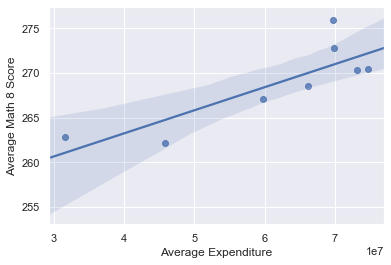

In [134]:
Xcal = calsc['Average Expenditure'].values.reshape(-1,1)
ycal = calsc['Average Math 8 Score'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xcal, ycal)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
print('\n')
X2c = sm.add_constant(Xcal)
est = sm.OLS(ycal, X2c)
est2 = est.fit()
print(est2.summary())
print('\n')
sns.regplot(x='Average Expenditure', y='Average Math 8 Score', data=calsc)

In [135]:
print("Wisconsin Average Math Scores for Grade 8")
wissc


Wisconsin Average Math Scores for Grade 8


,Year,Average Math 8 Score,Average Expenditure
0,1996,282.848742,6521058
1,2003,283.915866,9128279
2,2005,284.541557,9433502
3,2007,285.617943,9988878
4,2009,288.140726,10880480
5,2011,288.665933,11440718
6,2013,288.745781,10845059


The linear model is: Y = 273.05 + 1.3355e-06X


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     21.83
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00547
Time:                        23:59:04   Log-Likelihood:                -9.7589
No. Observations:                   7   AIC:                             23.52
Df Residuals:                       5   BIC:                             23.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

/Users/katietooher/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


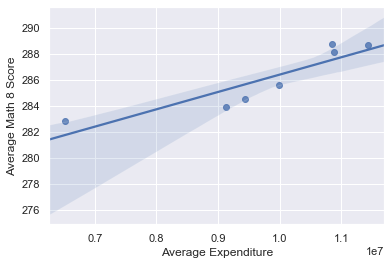

In [136]:
Xwi = wissc['Average Expenditure'].values.reshape(-1,1)
ywi = wissc['Average Math 8 Score'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xwi, ywi)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
print('\n')
X2w = sm.add_constant(Xwi)
est = sm.OLS(ywi, X2w)
est2 = est.fit()
print(est2.summary())
print('\n')
sns.regplot(x='Average Expenditure', y='Average Math 8 Score', data=wissc)

In [137]:
print("Montana Average Math Scores for Grade 8")
monta

Montana Average Math Scores for Grade 8


,Year,Average Math 8 Score,Average Expenditure
0,1996,283.003870,924259
1,2000,286.584607,1051768
2,2003,285.928023,1214879
3,2005,286.432001,1268328
4,2007,287.075529,1442434
5,2009,291.542943,1622485
6,2011,292.907804,1655584
7,2013,289.228453,1679521




The linear model is: Y = 274.36 + 9.9255e-06X


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     22.21
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00328
Time:                        23:59:06   Log-Likelihood:                -13.977
No. Observations:                   8   AIC:                             31.95
Df Residuals:                       6   BIC:                             32.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

/Users/katietooher/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


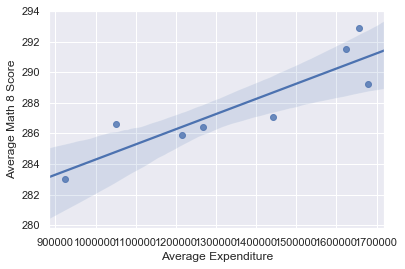

In [138]:
Xmon = monta['Average Expenditure'].values.reshape(-1,1)
ymon = monta['Average Math 8 Score'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xmon, ymon)
print('\n')
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
print('\n')
X2m = sm.add_constant(Xmon)
est = sm.OLS(ymon, X2m)
est2 = est.fit()
print(est2.summary())
print('\n')
sns.regplot(x='Average Expenditure', y='Average Math 8 Score', data=monta)

In [139]:
tX = np.column_stack((calsc['Average Math 8 Score'], calsc['Average Math 8 Score'],calsc['Average Math 8 Score']))
ty = calsc['Average Expenditure']
X3 = sm.add_constant(tX)
est = sm.OLS(ty, X3)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     Average Expenditure   R-squared:                       0.698
Model:                             OLS   Adj. R-squared:                  0.648
Method:                  Least Squares   F-statistic:                     13.90
Date:                 Thu, 12 Dec 2019   Prob (F-statistic):            0.00976
Time:                         23:59:07   Log-Likelihood:                -138.32
No. Observations:                    8   AIC:                             280.6
Df Residuals:                        6   BIC:                             280.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.647e+08   1.95e+08     -3.41